In [170]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [171]:
train_data = pd.read_csv("../input/train.csv")
#test_data = pd.read_csv("../input/test.csv")

In [172]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [173]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [174]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Note that we have more males than females

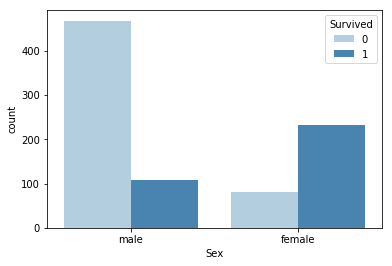

In [175]:
sns.countplot(x = "Sex", hue ="Survived",data = train_data, palette = "Blues");

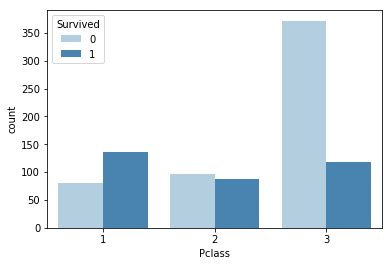

In [176]:
sns.countplot(x = "Pclass", hue ="Survived",data = train_data, palette = "Blues");

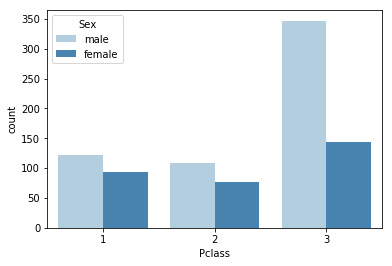

In [177]:
sns.countplot(x = "Pclass", hue ="Sex",data = train_data, palette = "Blues");

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


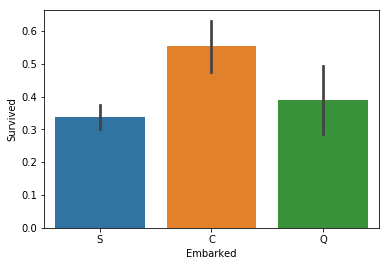

In [178]:
sns.barplot(x = "Embarked", y = "Survived", data = train_data)

In [179]:
features = ["Pclass","Sex","Age","Fare","Parch","SibSp","Embarked"]
y = train_data["Survived"]
train_data = train_data[features]

In [180]:
train_data.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Parch         0
SibSp         0
Embarked      2
dtype: int64

In [181]:
train_data['Age'].fillna(train_data['Age'].median(),inplace=True)

In [182]:
train_data['Embarked'].fillna(train_data['Embarked'].value_counts().index[0], inplace=True)

In [183]:
p = {1:'1st',2:'2nd',3:'3rd'} 
train_data['Pclass'] = train_data['Pclass'].map(p)

In [184]:
categorical_df = train_data[['Pclass','Sex','Embarked']]
one_hot_encode = pd.get_dummies(categorical_df,drop_first=True) 
train_data = train_data.drop(['Pclass','Sex','Embarked'],axis=1)
train_data = pd.concat([train_data,one_hot_encode],axis=1)

In [185]:
X = train_data
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state = 0)

# Training Model

In [186]:

clf = DecisionTreeClassifier()
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [187]:
pred = clf.predict(test_X)

In [188]:
from sklearn import metrics
metrics.accuracy_score(test_y, pred)

0.7892376681614349

In [189]:
#my_submission = pd.DataFrame({'PassengerId': testingData.PassengerId, 'Survived': pred})

In [190]:
#my_submission.to_csv('submission.csv', index=False)